In [1]:
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial


In [2]:
from bingo import *
from graph import *
from counting import *
from latex import *

In [3]:
RUNS = 5_000_000
DECKS=[1,2,3,4,5,10,15,20,25,30,35,40]
palette = colorblind_palette(len(DECKS))

In [4]:
np.random.seed(56734)

In [5]:
%%time

df_jokers = quick_deck_matches_on(RUNS, accept_jokers=True, decks=DECKS)
df_jokers

CPU times: user 260 ms, sys: 625 ms, total: 885 ms
Wall time: 4min 47s


,Deck count,Results,Successes,N,Probability
0,1,0 24 1 11 2 1 3 ...,4998721,5000000,99.97442
1,2,0 1 1 2 2 6 3 ...,5000000,5000000,100.00000
2,3,0 5 1 2 2 8 3 ...,5000000,5000000,100.00000
3,4,0 1 1 5 2 16 3 ...,5000000,5000000,100.00000
4,5,0 0 1 0 2 4 3 ...,5000000,5000000,100.00000
5,10,0 0 1 1 2 0 3 ...,5000000,5000000,100.00000
6,15,0 0 1 0 2 3 3 ...,5000000,5000000,100.00000
7,20,0 0 1 1 2 0 3 ...,5000000,5000000,100.00000
8,25,0 0 1 0 2 1 3 ...,5000000,5000000,100.00000
9,30,0 0 1 2 2 0 3 ...,5000000,5000000,100.00000


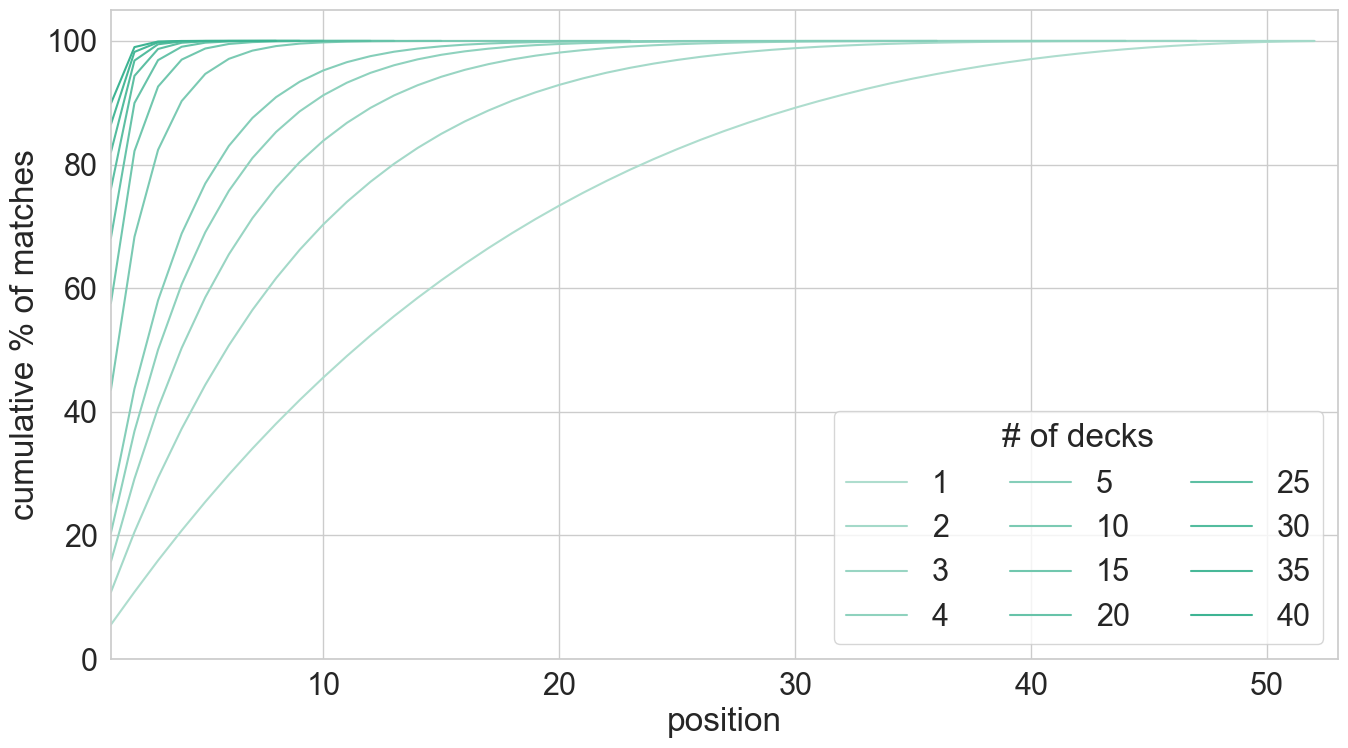

In [6]:
ax, data = print_cumulative(df_jokers, True, palette=palette[0], figsize=(14, 8))

plt.legend(loc='lower right', ncol=3, title="# of decks")
plt.xlim(1, 53)
plt.ylim(0, 105)
ax.set_xlabel("position")
ax.set_ylabel("cumulative % of matches")
plt.tight_layout()

plt.savefig(f"images/fig-the-naturally-ocurring-bingo-miracle.png")
plt.show()

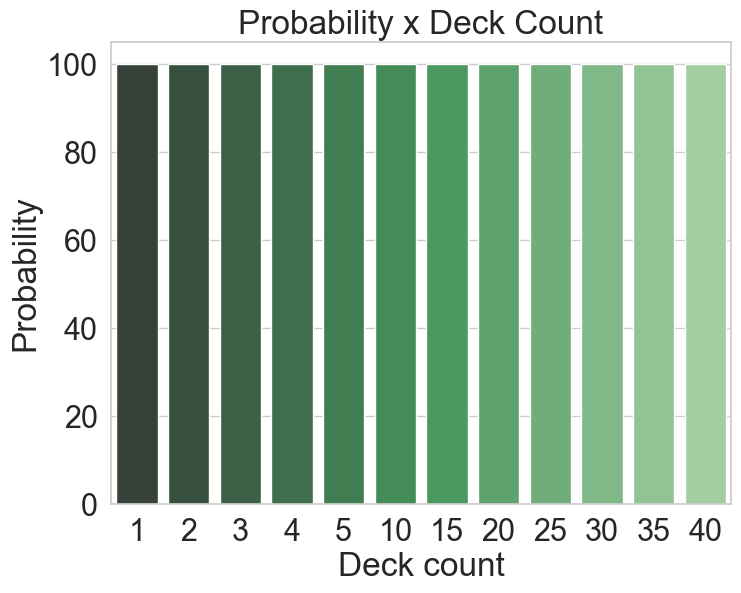

In [7]:
plot_all(df_jokers, "Probability")

In [8]:
prob_table_to_latex(df_jokers, name="the-naturally-ocurring-bingo-miracle")

\begin{table}[tb]
\label{tbl:the-naturally-ocurring-bingo-miracle}
\begin{tabular}{llll}
\toprule
 & Probability & CI lower & CI upper \\
Decks &  &  &  \\
\midrule
1 & 99.974% & 99.973% & 99.976% \\
2 & 100.000% & 100.000% & 100.000% \\
3 & 100.000% & 100.000% & 100.000% \\
4 & 100.000% & 100.000% & 100.000% \\
5 & 100.000% & 100.000% & 100.000% \\
10 & 100.000% & 100.000% & 100.000% \\
15 & 100.000% & 100.000% & 100.000% \\
20 & 100.000% & 100.000% & 100.000% \\
25 & 100.000% & 100.000% & 100.000% \\
30 & 100.000% & 100.000% & 100.000% \\
35 & 100.000% & 100.000% & 100.000% \\
40 & 100.000% & 100.000% & 100.000% \\
\bottomrule
\end{tabular}
\end{table}



In [9]:
data.head()

,decks,card,values
0,1,1,5.56772
1,1,2,10.85814
2,1,3,15.95840
3,1,4,20.79840
4,1,5,25.43176


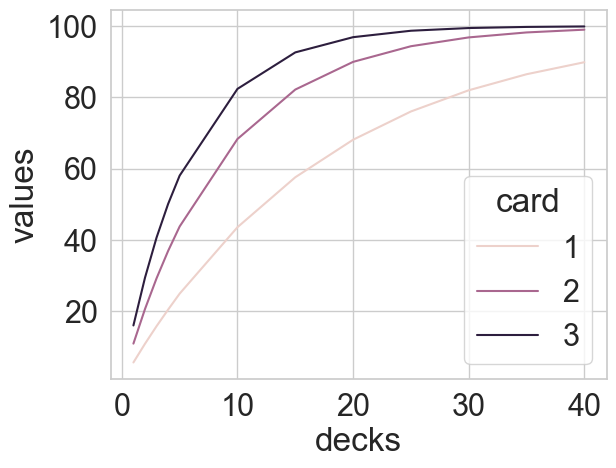

In [10]:
sns.lineplot(x="decks", y="values", hue="card", data=data.query("card <= 3"))
plt.show()

In [11]:
for i, (decks, card, values) in data.query("card==3").iterrows():
  print(decks, values, confidence(values * RUNS / 100, RUNS))


1.0 15.958400000000001 (0.15926325575090147, 0.15990526734553887)
2.0 29.35052 (0.29310621123850505, 0.2939045060694206)
3.0 40.6222 (0.40579158045337266, 0.4066525636495425)
4.0 50.05994 (0.5001611306991677, 0.501037668379771)
5.0 58.03628 (0.5799301669766297, 0.5807953095347721)
10.0 82.37819999999999 (0.8234477851928405, 0.8241157172711691)
15.0 92.61825999999999 (0.9259530807813829, 0.9264114643298894)
20.0 96.89226000000001 (0.9687701362895011, 0.9690743431458287)
25.0 98.69739999999999 (0.986874238209673, 0.9870730134871741)
30.0 99.45837999999999 (0.9945190851187127, 0.9946477548846203)
35.0 99.7701 (0.9976586360431918, 0.997742599170131)
40.0 99.90282 (0.9990005022278907, 0.9990551309460053)
